In [1]:
## Question
# Apply DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to the Iris dataset and explore the resulting clusters. 
# You will also identify any outliers and visualize the clustering results.
# Task:
#   1. Load the Iris dataset using sklearn.datasets.load_iris().
#   2. Preprocess the data by scaling the features to ensure that DBSCAN performs well.
#   3. Apply the DBSCAN clustering algorithm to the data, adjusting the parameters eps (maximum distance between two samples for one to be considered as in 
#      the neighborhood of the other) and min_samples (the number of points required to form a dense region).
#   4. Visualize the clustering results in two separate scatter plots:
#         Plot sepal length vs. sepal width and color the points based on their cluster labels.
#         Plot petal length vs. petal width and color the points based on their cluster labels.
#   5. Interpret the results by analyzing:
#         The number of clusters formed by DBSCAN.
#         The number of outliers (points labeled as -1).
#   6. Compare the DBSCAN clustering results with the true target labels (iris.target) and evaluate how well DBSCAN groups the flowers.
#   7. Experiment with different eps and min_samples values to observe how the clustering changes.
#   8. Try using another clustering algorithm, such as K-Means, on the same dataset and compare its results with DBSCAN.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

In [3]:
# 1. Loading the Iris dataset using sklearn.datasets.load_iris().
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# 2. Preprocessing the data by scaling the features to ensure that DBSCAN performs well.
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df['target'] = iris.target

scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [6]:
# 3. Applying the DBSCAN clustering algorithm to the data
dbscan = DBSCAN(eps=0.5, min_samples=4)
X = scaled_df.iloc[:, :-1]  # All features except target
clusters = dbscan.fit_predict(X)
scaled_df['cluster'] = clusters
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,0.222222,0.625000,0.067797,0.041667,0,0
1,0.166667,0.416667,0.067797,0.041667,0,0
2,0.111111,0.500000,0.050847,0.041667,0,0
3,0.083333,0.458333,0.084746,0.041667,0,0
4,0.194444,0.666667,0.067797,0.041667,0,0
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0
146,0.555556,0.208333,0.677966,0.750000,2,0
147,0.611111,0.416667,0.711864,0.791667,2,0
148,0.527778,0.583333,0.745763,0.916667,2,0


sepal length vs. sepal width


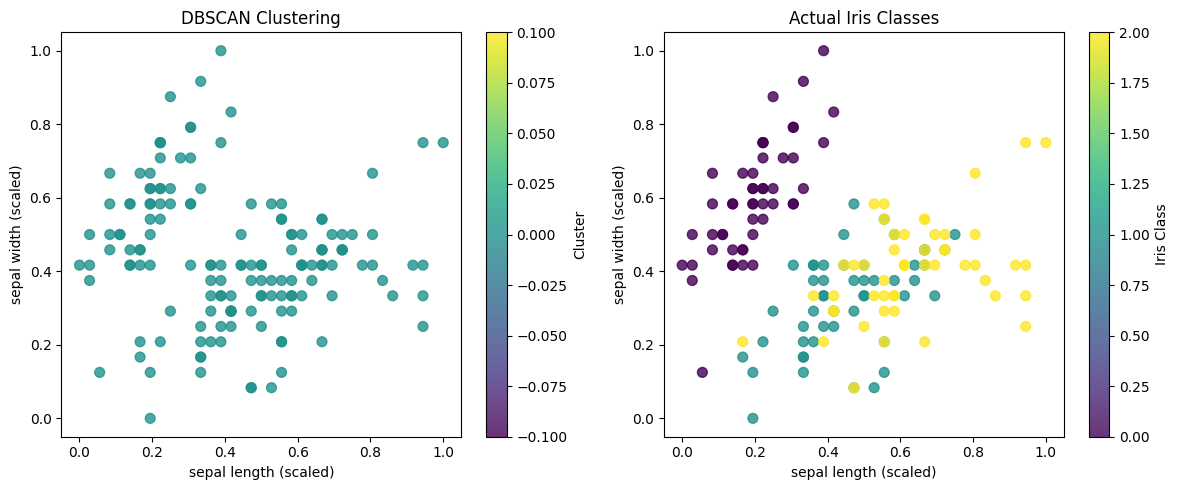

petal length vs. petal width


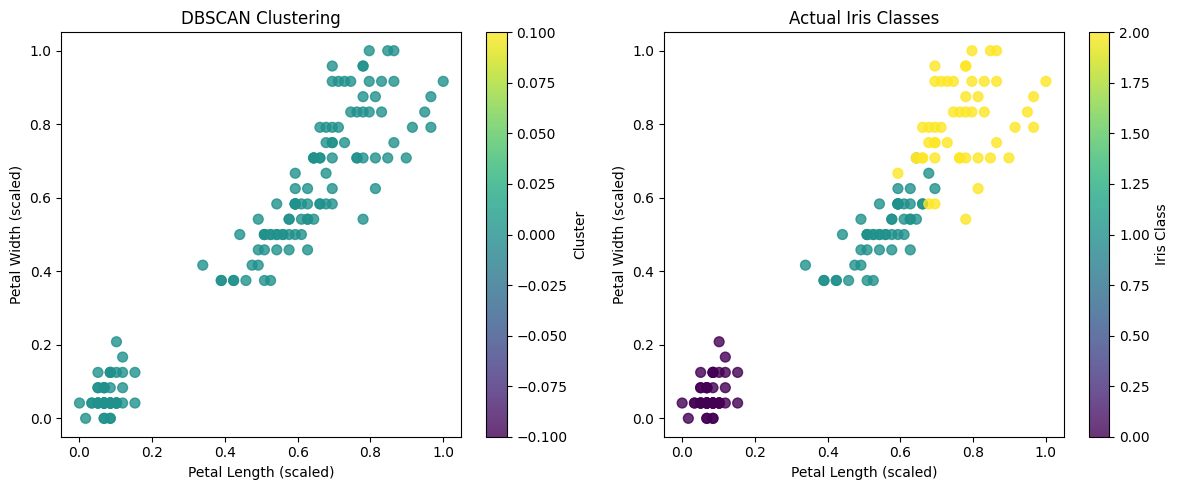

In [7]:
# 4. Visualizing the clustering results

# Sepal length vs sepal width
plt.figure(figsize=(12, 5))

# DBSCAN clusters
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(scaled_df['sepal length (cm)'], scaled_df['sepal width (cm)'], 
                      c=scaled_df['cluster'], cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter1, label='Cluster')
plt.title('DBSCAN Clustering')
plt.xlabel('sepal length (scaled)')
plt.ylabel('sepal width (scaled)')

# Actual Iris classes
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(scaled_df['sepal length (cm)'], scaled_df['sepal width (cm)'], 
                      c=scaled_df['target'], cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter2, label='Iris Class')
plt.title('Actual Iris Classes')
plt.xlabel('sepal length (scaled)')
plt.ylabel('sepal width (scaled)')

plt.tight_layout()
print("sepal length vs. sepal width")
plt.show()

#-------------------------------

# petal length vs petal width
plt.figure(figsize=(12, 5))

# DBSCAN clusters

plt.subplot(1, 2, 1)
scatter1 = plt.scatter(scaled_df['petal length (cm)'], scaled_df['petal width (cm)'], 
                      c=scaled_df['cluster'], cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter1, label='Cluster')
plt.title('DBSCAN Clustering')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')

# Actual Iris classes
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(scaled_df['petal length (cm)'], scaled_df['petal width (cm)'], 
                      c=scaled_df['target'], cmap='viridis', s=50, alpha=0.8)
plt.colorbar(scatter2, label='Iris Class')
plt.title('Actual Iris Classes')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')

plt.tight_layout()
print("petal length vs. petal width")
plt.show()



In [8]:
# 5. Interpretation
# The number of clusters formed by DBSCAN 
# The number of outliers (points labeled as -1).

# Count unique clusters and outliers
unique_clusters = np.unique(scaled_df['cluster'])
print(f"Unique cluster labels: {unique_clusters}")

# Count the number of clusters (excluding outliers which are labeled as -1)
n_clusters = len([c for c in unique_clusters if c != -1])
print(f"Number of clusters formed by DBSCAN: {n_clusters}")

# Count outliers (points labeled as -1)
n_outliers = np.sum(scaled_df['cluster'] == -1)
print(f"Number of outliers (noise points): {n_outliers}")

# Display the distribution of points in each cluster
cluster_counts = scaled_df['cluster'].value_counts().sort_index()
print("\nPoints in each cluster:")
print(cluster_counts)

Unique cluster labels: [0]
Number of clusters formed by DBSCAN: 1
Number of outliers (noise points): 0

Points in each cluster:
cluster
0    150
Name: count, dtype: int64


In [9]:
# check if all entries are true
compare = (scaled_df['target'] == scaled_df['cluster']).to_numpy()
count_true = np.sum(compare) # number of Trues

print("Correct Percentage: ", count_true*100/compare.size, "%")



Correct Percentage:  33.333333333333336 %


In [10]:
# Experimentation with different eps value

for i in range(1, 10):
    print("------- iter ", i, "----------")
    print("eps: {:.2f}".format(0.05*i) )

    dbscan = DBSCAN(eps=0.05*i, min_samples=4)
    # X = scaled_df.iloc[:, :-1]
    clusters = dbscan.fit_predict(X)
    scaled_df['cluster'] = clusters
    scaled_df

    cluster_counts = scaled_df['cluster'].value_counts().sort_index()
    compare = (scaled_df['target'] == scaled_df['cluster']).to_numpy()
    count_true = np.sum(compare) # number of Trues

    print("Correct Percentage: {:.2f}%".format(count_true*100/compare.size))
    # print("\nPoints in each cluster:")
    # print(cluster_counts)
    print("")


------- iter  1 ----------
eps: 0.05
Correct Percentage: 4.00%

------- iter  2 ----------
eps: 0.10
Correct Percentage: 39.33%

------- iter  3 ----------
eps: 0.15
Correct Percentage: 62.67%

------- iter  4 ----------
eps: 0.20
Correct Percentage: 66.00%

------- iter  5 ----------
eps: 0.25
Correct Percentage: 66.00%

------- iter  6 ----------
eps: 0.30
Correct Percentage: 66.67%

------- iter  7 ----------
eps: 0.35
Correct Percentage: 66.67%

------- iter  8 ----------
eps: 0.40
Correct Percentage: 66.67%

------- iter  9 ----------
eps: 0.45
Correct Percentage: 66.67%



Minimum best value of eps: 0.35

In [11]:
# Apply the DBSCAN clustering algorithm to the data
dbscan = DBSCAN(eps=0.35, min_samples=4)
X = scaled_df.iloc[:, :-1]  # All features except target
clusters = dbscan.fit_predict(X)
scaled_df['cluster'] = clusters

In [12]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(scaled_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]])
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [13]:
scaled_df['Kmeans'] = y_pred
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,Kmeans
0,0.222222,0.625000,0.067797,0.041667,0,0,1
1,0.166667,0.416667,0.067797,0.041667,0,0,1
2,0.111111,0.500000,0.050847,0.041667,0,0,1
3,0.083333,0.458333,0.084746,0.041667,0,0,1
4,0.194444,0.666667,0.067797,0.041667,0,0,1
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,2,0
146,0.555556,0.208333,0.677966,0.750000,2,2,2
147,0.611111,0.416667,0.711864,0.791667,2,2,0
148,0.527778,0.583333,0.745763,0.916667,2,2,0


In [14]:
# Test accuracy of k-means
cluster_counts = scaled_df['Kmeans'].value_counts().sort_index()
compare = (scaled_df['target'] == scaled_df['Kmeans']).to_numpy()
count_true = np.sum(compare)  # Number of Trues
value = (count_true * 100) / compare.size

print("Correct Percentage (k-means): {:.2f}%".format(value))

Correct Percentage (k-means): 9.33%


With DBSCAN we get a 100 % accuracy (eps=0.35) while with K Means (n_clusters=3) we only get accuracy of 88.67%

also since k means works by randomly assigning the cluster id, we need to cross verify for correct output labeling